<a href="https://colab.research.google.com/github/Divyanshu-ISM/Oil-and-Gas-data-analysis/blob/master/oil_Nodal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Vogel's IPR 

## data-

Reservoir pressure = 3000 psia'

Tested flowing bottom-hole pressure, pwf 1 = 2000 psia

Tested production rate at pwf 1, q1 =500 stb=day

Tested flowing bottom-hole pressure, pwf 2 = 1000 psia

Tested production rate at pwf 2, q2 = 800 stb=day

In [4]:
Pres = float(input("Enter the reservoir pressure: "))

pwf1 = float(input("Enter the test pwf1: "))
q1 = float(input("Enter the test flow rate(at pwf1): "))

pwf2 = float(input("Enter the test pw2: "))
q2 = float(input("Enter the test flow rate(at pwf2): "))




Enter the reservoir pressure: 3000
Enter the test pwf1: 2000
Enter the test flow rate(at pwf1): 500
Enter the test pw2: 1000
Enter the test flow rate(at pwf2): 800


#As per Vogel's equation:


In [6]:
qmax = q1/(1 - 0.2*(pwf1/Pres) - 0.8*(pwf1/Pres)**2)
qmax

978.2608695652175

In [8]:
J_star = (1.8*qmax)/Pres
J_star

0.5869565217391305

In [11]:
q = np.linspace(0,qmax,50)

In [12]:
pwf = 0.125*Pres*((81 - 80*(q/qmax))**0.5 - 1)

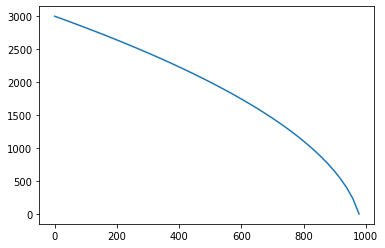

#Wellbore Performance : Pottman and Carpenter

## Pwf - Pwh = (rho + k/rho)*h/144

### rho = Avg density, k is function of q^2

In [16]:
rho = 19.53 #lb/ft3
M = 495.66
f = 0.002
D = 1.66/12

In [25]:
k = (f*(q**2)*(M**2))/(7.4*(10**10)*(D**5))

In [30]:
pwf_out = (rho + k/rho)*2000

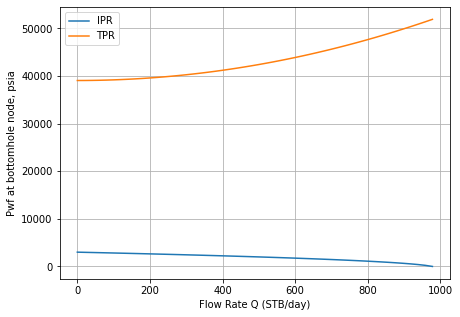

In [40]:
plt.figure(figsize=(7,5))

sns.lineplot(q,pwf,label='IPR')
sns.lineplot(q,pwf_out,label='TPR')

plt.xlabel('Flow Rate Q (STB/day)')
plt.ylabel('Pwf at bottomhole node, psia')

plt.grid()